In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
sns.set()
# Filter out the warning about deprecated distplot
warnings.filterwarnings("ignore")

In [2]:
# Set the display options to show all columns and rows without truncation
pd.set_option('display.max_columns', None)

In [3]:
path = os.path.join(os.path.expanduser("~"), "project/data", "shopping_behavior_updated.csv")

In [4]:
df = pd.read_csv(path)

In [5]:
label = {}

In [6]:
def remove_outliers(df, column_name):
    # Step 1: Calculate the IQR for the specified column
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    # Step 2: Define the lower and upper bounds for outlier removal
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Step 3: Update the specified column with the cleaned data
    df[f'{column_name}c*'] = np.where(
        (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound),
        df[column_name],
        np.nan
    )

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.shape

(3900, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [11]:
df.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


# **<font size=21px color="solid red">INDEX</font>**

### [--Customer-ID](#Customer-ID)
### [--Age](#Age)
### [--Gender](#Gender)
### [--Item-Purchased](#Item-Purchased)
### [--Category](#Category)
### [--Purchase-Amount-(USD)](#Purchase-Amount-(USD))
### [--Location](#Location)
### [--Size](#Size)
### [--Color](#Color)
### [--Season](#Season)
### [--Review-Rating](#Review-Rating)
### [--Subscription-Status](#Subscription-Status)
### [--Shipping-Type](#Shipping-Type)
### [--Discount-Applied](#Discount-Applied)
### [--Promo-Code-Used](#Promo-Code-Used)
### [--Previous-Purchases](#Previous-Purchases)
### [--Payment-Method](#Payment-Method)
### [--Frequency-of-Purchases](#Frequency-of-Purchases)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Customer ID</font>**

In [12]:
print(f"{df['Customer ID'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Customer ID'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Customer ID'].sort_values().tail(5)}")

0    1
1    2
2    3
3    4
4    5
Name: Customer ID, dtype: int64

*********************

top 5 sorted values
0    1
1    2
2    3
3    4
4    5
Name: Customer ID, dtype: int64

*********************

bottom 5 sorted values
3895    3896
3896    3897
3897    3898
3898    3899
3899    3900
Name: Customer ID, dtype: int64


### <font size=5px color='blue'>data operation</font>

In [13]:
print('null value in [Customer ID] == {}'.format(df['Customer ID'].isnull().sum()))

null value in [Customer ID] == 0


In [14]:
print(f'unique values in [Customer ID] == {df['Customer ID'].nunique()}')

unique values in [Customer ID] == 3900


In [15]:
print(f'top 5 unique values:\nvalue - count : {df['Customer ID'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Customer ID'].value_counts()[-5:]}')

top 5 unique values:
value - count : Customer ID
3900    1
1       1
2       1
3       1
4       1
Name: count, dtype: int64

*********************

bottom 5 unique value:
value - count :  Customer ID
32    1
33    1
34    1
35    1
36    1
Name: count, dtype: int64


#### <font size= 3.5px color='blue'>dtype</font>

In [16]:
df['Customer ID'].dtype
# format if dtype is wrong

dtype('int64')

In [17]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Customer ID'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Customer ID'], errors='coerce')



In [18]:
# format opreation
# if dtype is numeric skip this 4 cell


In [19]:
# key = df['Customer ID'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [20]:
# Customer ID = dict(zip(key,values)) # label data in 'key': value pair
# label['Customer ID'] = Customer ID # store data label dict in main dict actually it's updating/

In [21]:
# df['Customer ID'].replace(Customer ID, inplace=True)
# print('Modified DataFrame:')
# print(df['Customer ID'].head(10))

In [22]:
df['Customer ID'].unique()

array([   1,    2,    3, ..., 3898, 3899, 3900])

Text(0, 0.5, 'Customer ID values')

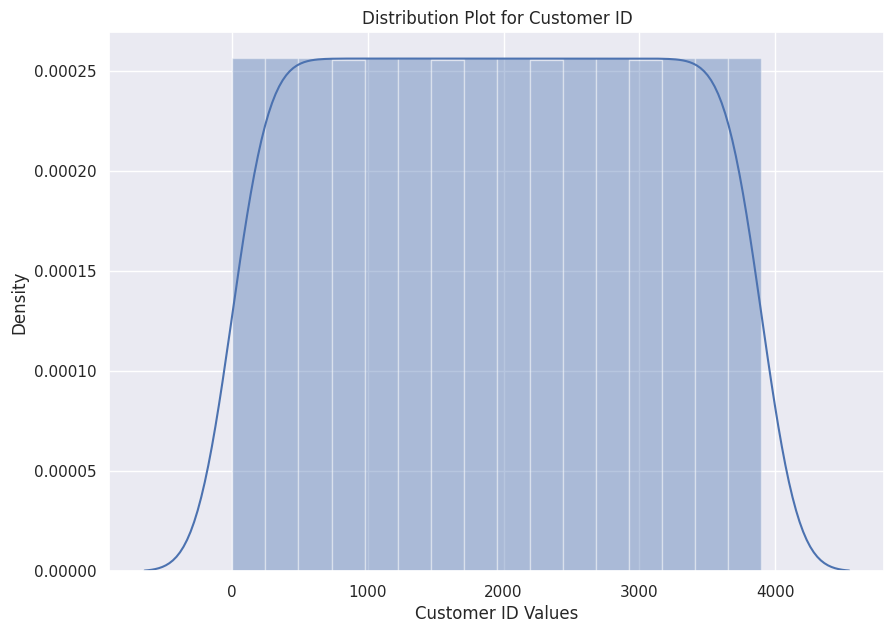

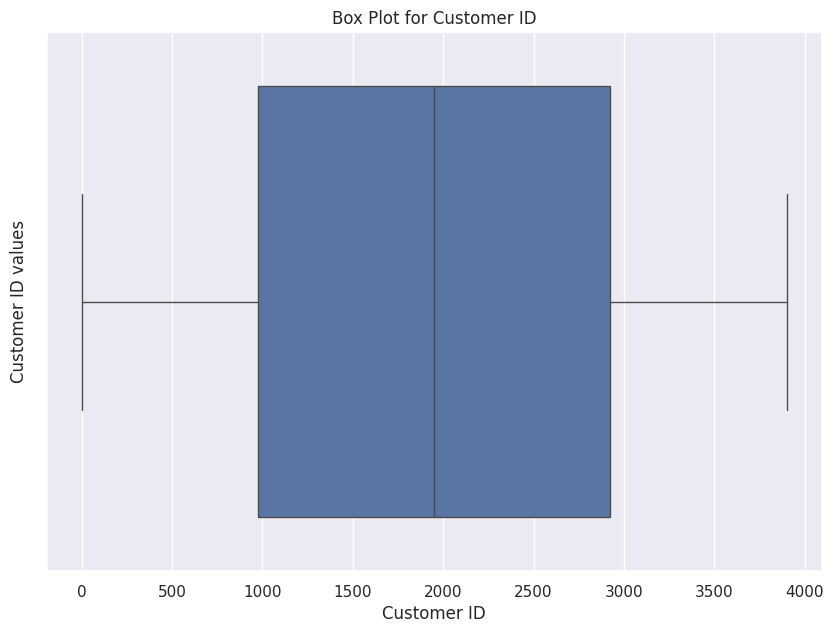

In [23]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Customer ID'])
plt.title('Distribution Plot for Customer ID')  # Title for the plot
plt.xlabel('Customer ID Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Customer ID'],orient='h')
plt.title('Box Plot for Customer ID')  # Title for the plot
plt.xlabel('Customer ID')  # X-axis label
plt.ylabel('Customer ID values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [24]:
## for removing null value
# df.dropna(subset=['Customer ID'], inplace=True)

In [25]:
# mean = df['Customer ID'].mean()
# print(mean)

# median = df['Customer ID'].median()
# print(median)

# mode = df['Customer ID'].mode()
# print(mode)

In [26]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Customer ID'].fillna(df['Customer ID'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Customer ID'].fillna(df['Customer ID'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Customer ID'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Customer ID'].fillna(df['Customer ID'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [27]:
# remove_outliers(df,'Customer ID')

In [28]:
# print('null value in Customer IDc* == {}'.format(df['Customer ID']c*.isnull().sum()))

In [29]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Customer IDc*'].fillna(df['Customer IDc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Customer IDc*'].fillna(df['Customer IDc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Customer IDc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Customer IDc*'].fillna(df['Customer IDc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [30]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [31]:
print('null value in [Customer ID] == {}'.format(df['Customer ID'].isnull().sum()))
# print('\n---\n')
# print('null value in Customer IDc* == {}'.format(df['Customer IDc*'].isnull().sum()))

null value in [Customer ID] == 0


In [32]:
print(f'The dtype of [Customer ID] == {df['Customer ID'].dtype}')
# print('\n---\n')
# print(f'The dtype of Customer IDc* is {df['Customer IDc*'].dtype}')

The dtype of [Customer ID] == int64


In [33]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Customer IDc*'])
# plt.title('Distribution Plot for Customer IDc*')  ## Title for the plot
# plt.xlabel('Customer IDc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Customer IDc*'],orient='h')
# plt.title('Box Plot for Customer IDc*')  ## Title for the plot
# plt.xlabel('Customer IDc*')  ## X-axis label
# plt.ylabel('Customer IDc* values')

In [34]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Age</font>**

In [35]:
print(f"{df['Age'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Age'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Age'].sort_values().tail(5)}")

0    55
1    19
2    50
3    21
4    45
Name: Age, dtype: int64

*********************

top 5 sorted values
2498    18
24      18
643     18
2717    18
357     18
Name: Age, dtype: int64

*********************

bottom 5 sorted values
1244    70
3010    70
3067    70
2888    70
685     70
Name: Age, dtype: int64


### <font size=5px color='blue'>data operation</font>

In [36]:
print('null value in [Age] == {}'.format(df['Age'].isnull().sum()))

null value in [Age] == 0


In [37]:
print(f'unique values in [Age] == {df['Age'].nunique()}')

unique values in [Age] == 53


In [38]:
print(f'top 5 unique values:\nvalue - count : {df['Age'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Age'].value_counts()[-5:]}')

top 5 unique values:
value - count : Age
69    88
57    87
41    86
25    85
49    84
Name: count, dtype: int64

*********************

bottom 5 unique value:
value - count :  Age
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64


#### <font size= 3.5px color='blue'>dtype</font>

In [39]:
df['Age'].dtype
# format if dtype is wrong

dtype('int64')

In [40]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Age'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Age'], errors='coerce')



In [41]:
# format opreation
# if dtype is numeric skip this 4 cell


In [42]:
# key = df['Age'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [43]:
# Age = dict(zip(key,values)) # label data in 'key': value pair
# label['Age'] = Age # store data label dict in main dict actually it's updating/

In [44]:
# df['Age'].replace(Age, inplace=True)
# print('Modified DataFrame:')
# print(df['Age'].head(10))

In [45]:
df['Age'].unique()

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60])

Text(0, 0.5, 'Age values')

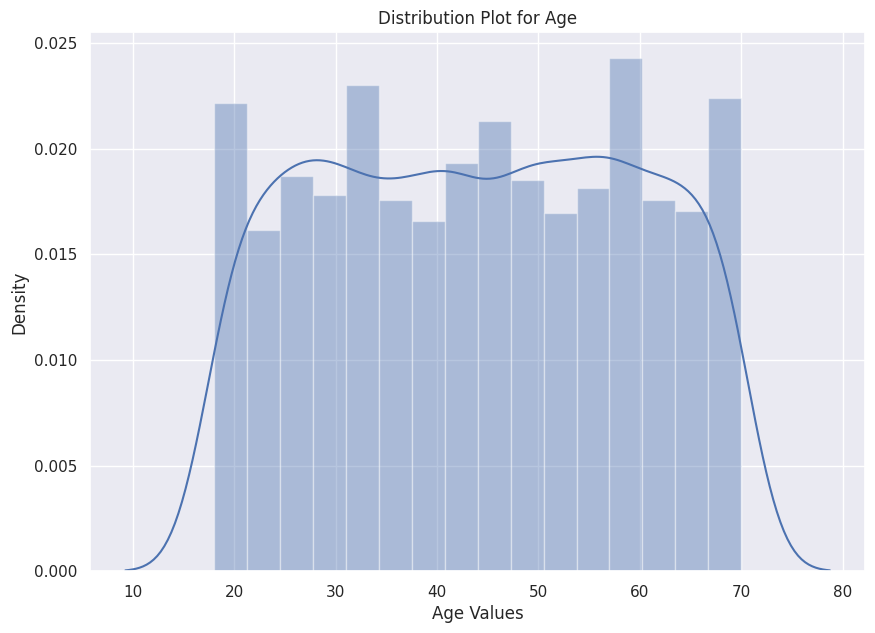

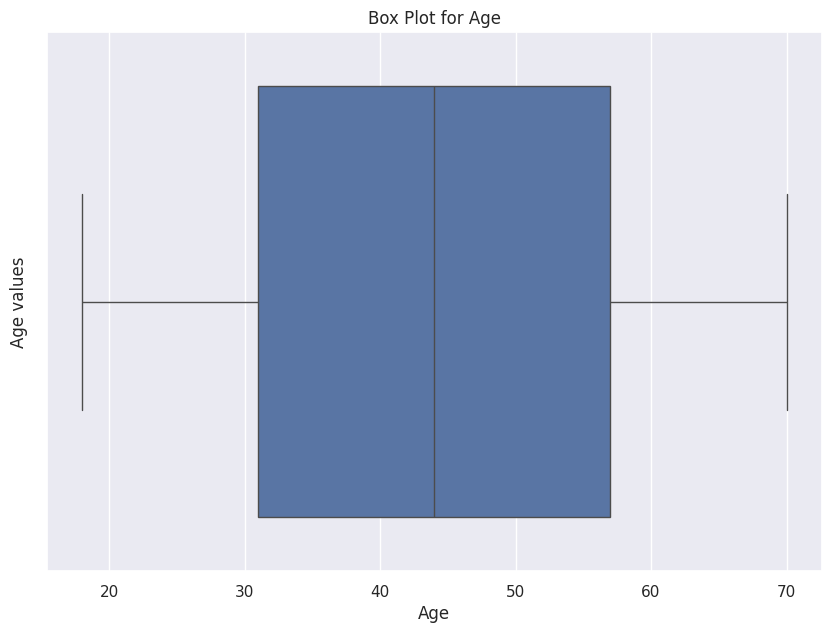

In [46]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Age'])
plt.title('Distribution Plot for Age')  # Title for the plot
plt.xlabel('Age Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Age'],orient='h')
plt.title('Box Plot for Age')  # Title for the plot
plt.xlabel('Age')  # X-axis label
plt.ylabel('Age values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [47]:
## for removing null value
# df.dropna(subset=['Age'], inplace=True)

In [48]:
# mean = df['Age'].mean()
# print(mean)

# median = df['Age'].median()
# print(median)

# mode = df['Age'].mode()
# print(mode)

In [49]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Age'].fillna(df['Age'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Age'].fillna(df['Age'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Age'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Age'].fillna(df['Age'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [50]:
# remove_outliers(df,'Age')

In [51]:
# print('null value in Agec* == {}'.format(df['Age']c*.isnull().sum()))

In [52]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Agec*'].fillna(df['Agec*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Agec*'].fillna(df['Agec*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Agec*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Agec*'].fillna(df['Agec*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [53]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [54]:
print('null value in [Age] == {}'.format(df['Age'].isnull().sum()))
# print('\n---\n')
# print('null value in Agec* == {}'.format(df['Agec*'].isnull().sum()))

null value in [Age] == 0


In [55]:
print(f'The dtype of [Age] == {df['Age'].dtype}')
# print('\n---\n')
# print(f'The dtype of Agec* is {df['Agec*'].dtype}')

The dtype of [Age] == int64


In [56]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Agec*'])
# plt.title('Distribution Plot for Agec*')  ## Title for the plot
# plt.xlabel('Agec* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Agec*'],orient='h')
# plt.title('Box Plot for Agec*')  ## Title for the plot
# plt.xlabel('Agec*')  ## X-axis label
# plt.ylabel('Agec* values')

In [57]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Gender</font>**

In [58]:
print(f"{df['Gender'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Gender'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Gender'].sort_values().tail(5)}")

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

*********************

top 5 sorted values
3899    Female
3063    Female
3064    Female
3065    Female
3066    Female
Name: Gender, dtype: object

*********************

bottom 5 sorted values
1305    Male
1306    Male
1307    Male
1279    Male
1949    Male
Name: Gender, dtype: object


### <font size=5px color='blue'>data operation</font>

In [59]:
print('null value in [Gender] == {}'.format(df['Gender'].isnull().sum()))

null value in [Gender] == 0


In [60]:
print(f'unique values in [Gender] == {df['Gender'].nunique()}')

unique values in [Gender] == 2


In [61]:
print(f'top 5 unique values:\nvalue - count : {df['Gender'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Gender'].value_counts()[-5:]}')

top 5 unique values:
value - count : Gender
Male      2652
Female    1248
Name: count, dtype: int64

*********************

bottom 5 unique value:
value - count :  Gender
Male      2652
Female    1248
Name: count, dtype: int64


#### <font size= 3.5px color='blue'>dtype</font>

In [62]:
df['Gender'].dtype
# format if dtype is wrong

dtype('O')

In [63]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Gender'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Gender'], errors='coerce')



In [64]:
# format opreation
# if dtype is numeric skip this 4 cell


In [83]:
key = df['Gender'].unique().tolist()
values = [0,1]  ## assign your values here
print(key)
print(values)  ## len of key and values should be same

['Male', 'Female']
[0, 1]


In [84]:
Gender = dict(zip(key,values)) # label data in 'key': value pair
label['Gender'] = Gender # store data label dict in main dict actually it's updating/

In [86]:
df['Gender'].replace(Gender, inplace=True)
print('Modified DataFrame:')
print(df['Gender'].head(10))

Modified DataFrame:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Gender, dtype: int64


In [87]:
df['Gender'].unique()

array([0, 1])

Text(0, 0.5, 'Gender values')

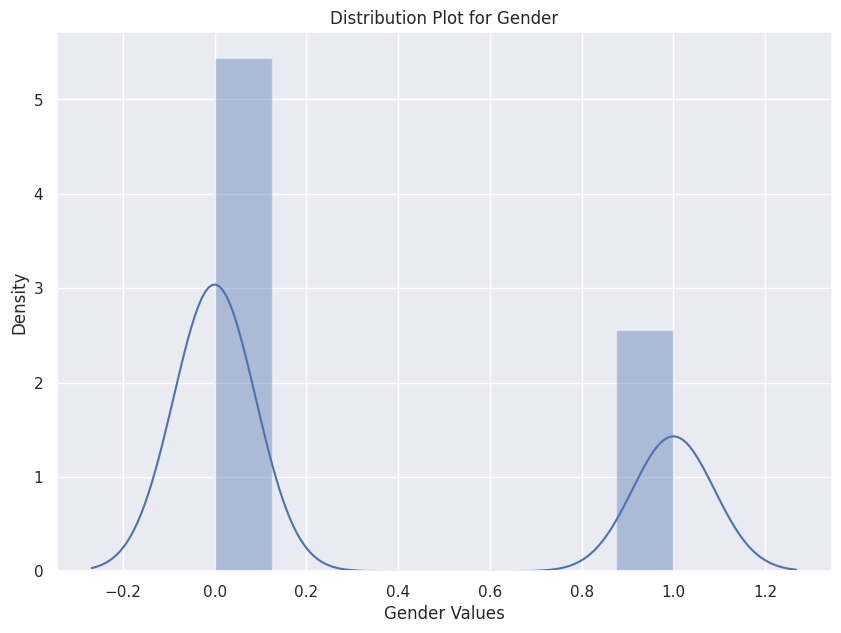

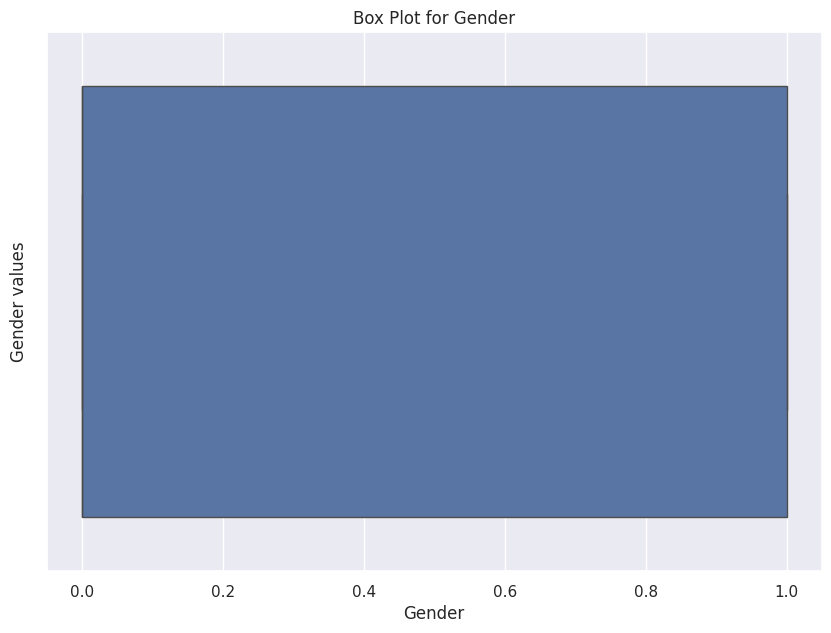

In [88]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Gender'])
plt.title('Distribution Plot for Gender')  # Title for the plot
plt.xlabel('Gender Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Gender'],orient='h')
plt.title('Box Plot for Gender')  # Title for the plot
plt.xlabel('Gender')  # X-axis label
plt.ylabel('Gender values')

In [119]:
count = df['Gender'].value_counts().tolist()
gender = Gender.keys()
gender_list = list(gender)

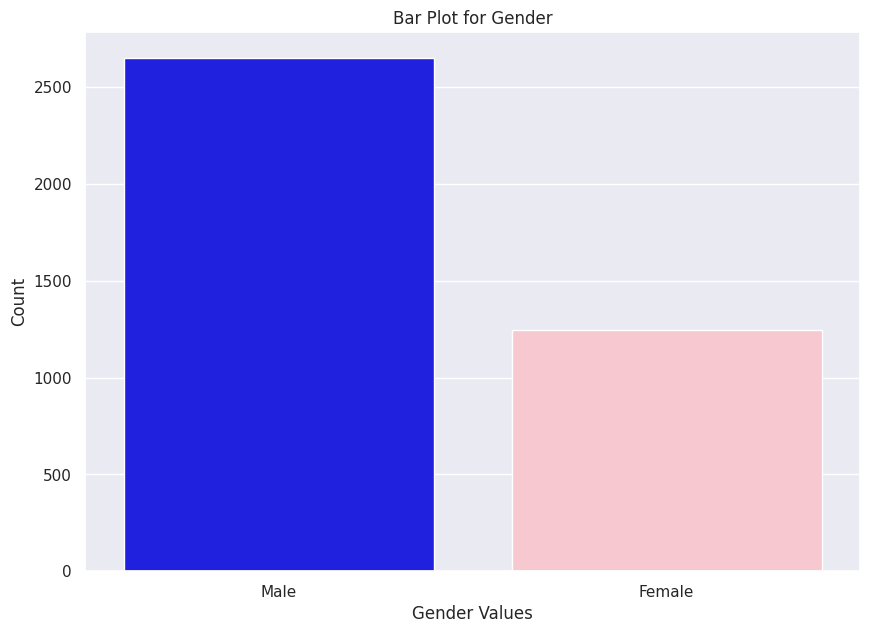

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'Gender' column with values 0 and 1
plt.figure(figsize=(10, 7))
sns.barplot(x=gender_list, y=count, orient='v', palette={'Male': 'blue', 'Female': 'pink'})

plt.title('Bar Plot for Gender')  # Title for the plot
plt.xlabel('Gender Values')  # X-axis label
plt.ylabel('Count')  # Y-axis label

plt.show()

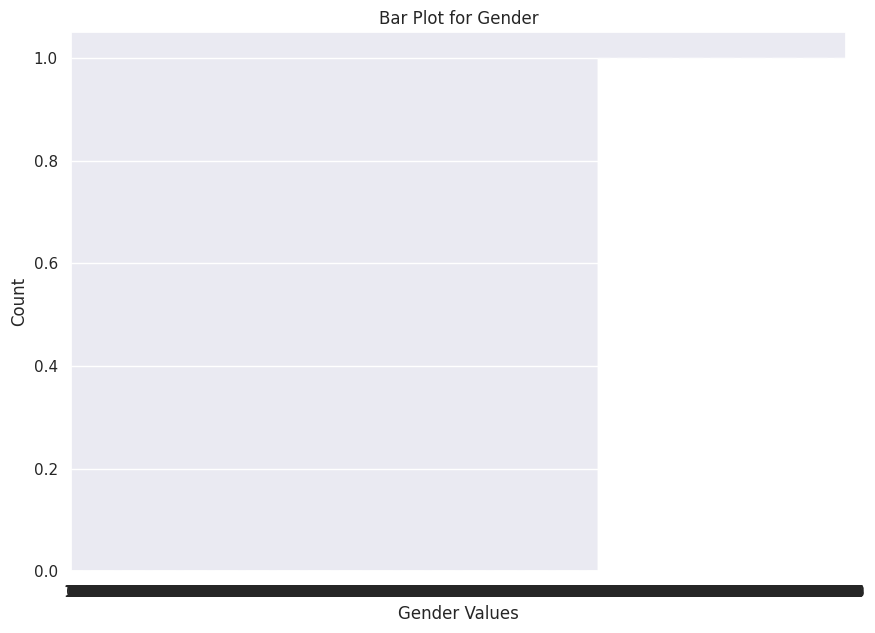

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'Gender' column with values 0 and 1
plt.figure(figsize=(10, 7))
sns.barplot(df['Gender'], palette={0: 'blue', 1: 'pink'})

plt.title('Bar Plot for Gender')  # Title for the plot
plt.xlabel('Gender Values')  # X-axis label
plt.ylabel('Count')  # Y-axis label

plt.show()


<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Gender'], inplace=True)

In [ ]:
# mean = df['Gender'].mean()
# print(mean)

# median = df['Gender'].median()
# print(median)

# mode = df['Gender'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Gender'].fillna(df['Gender'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Gender'].fillna(df['Gender'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Gender'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Gender')

In [ ]:
# print('null value in Genderc* == {}'.format(df['Gender']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Genderc*'].fillna(df['Genderc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Genderc*'].fillna(df['Genderc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Genderc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Genderc*'].fillna(df['Genderc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Gender] == {}'.format(df['Gender'].isnull().sum()))
# print('\n---\n')
# print('null value in Genderc* == {}'.format(df['Genderc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Gender] == {df['Gender'].dtype}')
# print('\n---\n')
# print(f'The dtype of Genderc* is {df['Genderc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Genderc*'])
# plt.title('Distribution Plot for Genderc*')  ## Title for the plot
# plt.xlabel('Genderc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Genderc*'],orient='h')
# plt.title('Box Plot for Genderc*')  ## Title for the plot
# plt.xlabel('Genderc*')  ## X-axis label
# plt.ylabel('Genderc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Item Purchased</font>**

In [ ]:
print(f"{df['Item Purchased'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Item Purchased'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Item Purchased'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Item Purchased] == {}'.format(df['Item Purchased'].isnull().sum()))

In [ ]:
print(f'unique values in [Item Purchased] == {df['Item Purchased'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Item Purchased'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Item Purchased'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Item Purchased'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Item Purchased'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Item Purchased'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Item Purchased'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Item Purchased = dict(zip(key,values)) # label data in 'key': value pair
# label['Item Purchased'] = Item Purchased # store data label dict in main dict actually it's updating/

In [ ]:
# df['Item Purchased'].replace(Item Purchased, inplace=True)
# print('Modified DataFrame:')
# print(df['Item Purchased'].head(10))

In [ ]:
df['Item Purchased'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Item Purchased'])
plt.title('Distribution Plot for Item Purchased')  # Title for the plot
plt.xlabel('Item Purchased Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Item Purchased'],orient='h')
plt.title('Box Plot for Item Purchased')  # Title for the plot
plt.xlabel('Item Purchased')  # X-axis label
plt.ylabel('Item Purchased values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Item Purchased'], inplace=True)

In [ ]:
# mean = df['Item Purchased'].mean()
# print(mean)

# median = df['Item Purchased'].median()
# print(median)

# mode = df['Item Purchased'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Item Purchased'].fillna(df['Item Purchased'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Item Purchased'].fillna(df['Item Purchased'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Item Purchased'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Item Purchased'].fillna(df['Item Purchased'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Item Purchased')

In [ ]:
# print('null value in Item Purchasedc* == {}'.format(df['Item Purchased']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Item Purchasedc*'].fillna(df['Item Purchasedc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Item Purchasedc*'].fillna(df['Item Purchasedc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Item Purchasedc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Item Purchasedc*'].fillna(df['Item Purchasedc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Item Purchased] == {}'.format(df['Item Purchased'].isnull().sum()))
# print('\n---\n')
# print('null value in Item Purchasedc* == {}'.format(df['Item Purchasedc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Item Purchased] == {df['Item Purchased'].dtype}')
# print('\n---\n')
# print(f'The dtype of Item Purchasedc* is {df['Item Purchasedc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Item Purchasedc*'])
# plt.title('Distribution Plot for Item Purchasedc*')  ## Title for the plot
# plt.xlabel('Item Purchasedc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Item Purchasedc*'],orient='h')
# plt.title('Box Plot for Item Purchasedc*')  ## Title for the plot
# plt.xlabel('Item Purchasedc*')  ## X-axis label
# plt.ylabel('Item Purchasedc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Category</font>**

In [ ]:
print(f"{df['Category'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Category'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Category'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Category] == {}'.format(df['Category'].isnull().sum()))

In [ ]:
print(f'unique values in [Category] == {df['Category'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Category'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Category'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Category'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Category'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Category'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Category'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Category = dict(zip(key,values)) # label data in 'key': value pair
# label['Category'] = Category # store data label dict in main dict actually it's updating/

In [ ]:
# df['Category'].replace(Category, inplace=True)
# print('Modified DataFrame:')
# print(df['Category'].head(10))

In [ ]:
df['Category'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Category'])
plt.title('Distribution Plot for Category')  # Title for the plot
plt.xlabel('Category Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Category'],orient='h')
plt.title('Box Plot for Category')  # Title for the plot
plt.xlabel('Category')  # X-axis label
plt.ylabel('Category values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Category'], inplace=True)

In [ ]:
# mean = df['Category'].mean()
# print(mean)

# median = df['Category'].median()
# print(median)

# mode = df['Category'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Category'].fillna(df['Category'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Category'].fillna(df['Category'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Category'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Category'].fillna(df['Category'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Category')

In [ ]:
# print('null value in Categoryc* == {}'.format(df['Category']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Categoryc*'].fillna(df['Categoryc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Categoryc*'].fillna(df['Categoryc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Categoryc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Categoryc*'].fillna(df['Categoryc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Category] == {}'.format(df['Category'].isnull().sum()))
# print('\n---\n')
# print('null value in Categoryc* == {}'.format(df['Categoryc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Category] == {df['Category'].dtype}')
# print('\n---\n')
# print(f'The dtype of Categoryc* is {df['Categoryc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Categoryc*'])
# plt.title('Distribution Plot for Categoryc*')  ## Title for the plot
# plt.xlabel('Categoryc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Categoryc*'],orient='h')
# plt.title('Box Plot for Categoryc*')  ## Title for the plot
# plt.xlabel('Categoryc*')  ## X-axis label
# plt.ylabel('Categoryc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Purchase Amount (USD)</font>**

In [ ]:
print(f"{df['Purchase Amount (USD)'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Purchase Amount (USD)'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Purchase Amount (USD)'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Purchase Amount (USD)] == {}'.format(df['Purchase Amount (USD)'].isnull().sum()))

In [ ]:
print(f'unique values in [Purchase Amount (USD)] == {df['Purchase Amount (USD)'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Purchase Amount (USD)'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Purchase Amount (USD)'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Purchase Amount (USD)'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Purchase Amount (USD)'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Purchase Amount (USD)'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Purchase Amount (USD) = dict(zip(key,values)) # label data in 'key': value pair
# label['Purchase Amount (USD)'] = Purchase Amount (USD) # store data label dict in main dict actually it's updating/

In [ ]:
# df['Purchase Amount (USD)'].replace(Purchase Amount (USD), inplace=True)
# print('Modified DataFrame:')
# print(df['Purchase Amount (USD)'].head(10))

In [ ]:
df['Purchase Amount (USD)'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Purchase Amount (USD)'])
plt.title('Distribution Plot for Purchase Amount (USD)')  # Title for the plot
plt.xlabel('Purchase Amount (USD) Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Purchase Amount (USD)'],orient='h')
plt.title('Box Plot for Purchase Amount (USD)')  # Title for the plot
plt.xlabel('Purchase Amount (USD)')  # X-axis label
plt.ylabel('Purchase Amount (USD) values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Purchase Amount (USD)'], inplace=True)

In [ ]:
# mean = df['Purchase Amount (USD)'].mean()
# print(mean)

# median = df['Purchase Amount (USD)'].median()
# print(median)

# mode = df['Purchase Amount (USD)'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Purchase Amount (USD)'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Purchase Amount (USD)')

In [ ]:
# print('null value in Purchase Amount (USD)c* == {}'.format(df['Purchase Amount (USD)']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Purchase Amount (USD)c*'].fillna(df['Purchase Amount (USD)c*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Purchase Amount (USD)c*'].fillna(df['Purchase Amount (USD)c*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Purchase Amount (USD)c*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Purchase Amount (USD)c*'].fillna(df['Purchase Amount (USD)c*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Purchase Amount (USD)] == {}'.format(df['Purchase Amount (USD)'].isnull().sum()))
# print('\n---\n')
# print('null value in Purchase Amount (USD)c* == {}'.format(df['Purchase Amount (USD)c*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Purchase Amount (USD)] == {df['Purchase Amount (USD)'].dtype}')
# print('\n---\n')
# print(f'The dtype of Purchase Amount (USD)c* is {df['Purchase Amount (USD)c*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Purchase Amount (USD)c*'])
# plt.title('Distribution Plot for Purchase Amount (USD)c*')  ## Title for the plot
# plt.xlabel('Purchase Amount (USD)c* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Purchase Amount (USD)c*'],orient='h')
# plt.title('Box Plot for Purchase Amount (USD)c*')  ## Title for the plot
# plt.xlabel('Purchase Amount (USD)c*')  ## X-axis label
# plt.ylabel('Purchase Amount (USD)c* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Location</font>**

In [ ]:
print(f"{df['Location'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Location'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Location'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Location] == {}'.format(df['Location'].isnull().sum()))

In [ ]:
print(f'unique values in [Location] == {df['Location'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Location'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Location'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Location'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Location'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Location'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Location'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Location = dict(zip(key,values)) # label data in 'key': value pair
# label['Location'] = Location # store data label dict in main dict actually it's updating/

In [ ]:
# df['Location'].replace(Location, inplace=True)
# print('Modified DataFrame:')
# print(df['Location'].head(10))

In [ ]:
df['Location'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Location'])
plt.title('Distribution Plot for Location')  # Title for the plot
plt.xlabel('Location Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Location'],orient='h')
plt.title('Box Plot for Location')  # Title for the plot
plt.xlabel('Location')  # X-axis label
plt.ylabel('Location values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Location'], inplace=True)

In [ ]:
# mean = df['Location'].mean()
# print(mean)

# median = df['Location'].median()
# print(median)

# mode = df['Location'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Location'].fillna(df['Location'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Location'].fillna(df['Location'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Location'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Location'].fillna(df['Location'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Location')

In [ ]:
# print('null value in Locationc* == {}'.format(df['Location']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Locationc*'].fillna(df['Locationc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Locationc*'].fillna(df['Locationc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Locationc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Locationc*'].fillna(df['Locationc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Location] == {}'.format(df['Location'].isnull().sum()))
# print('\n---\n')
# print('null value in Locationc* == {}'.format(df['Locationc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Location] == {df['Location'].dtype}')
# print('\n---\n')
# print(f'The dtype of Locationc* is {df['Locationc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Locationc*'])
# plt.title('Distribution Plot for Locationc*')  ## Title for the plot
# plt.xlabel('Locationc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Locationc*'],orient='h')
# plt.title('Box Plot for Locationc*')  ## Title for the plot
# plt.xlabel('Locationc*')  ## X-axis label
# plt.ylabel('Locationc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Size</font>**

In [ ]:
print(f"{df['Size'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Size'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Size'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Size] == {}'.format(df['Size'].isnull().sum()))

In [ ]:
print(f'unique values in [Size] == {df['Size'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Size'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Size'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Size'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Size'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Size'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Size'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Size = dict(zip(key,values)) # label data in 'key': value pair
# label['Size'] = Size # store data label dict in main dict actually it's updating/

In [ ]:
# df['Size'].replace(Size, inplace=True)
# print('Modified DataFrame:')
# print(df['Size'].head(10))

In [ ]:
df['Size'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Size'])
plt.title('Distribution Plot for Size')  # Title for the plot
plt.xlabel('Size Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Size'],orient='h')
plt.title('Box Plot for Size')  # Title for the plot
plt.xlabel('Size')  # X-axis label
plt.ylabel('Size values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Size'], inplace=True)

In [ ]:
# mean = df['Size'].mean()
# print(mean)

# median = df['Size'].median()
# print(median)

# mode = df['Size'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Size'].fillna(df['Size'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Size'].fillna(df['Size'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Size'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Size'].fillna(df['Size'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Size')

In [ ]:
# print('null value in Sizec* == {}'.format(df['Size']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Sizec*'].fillna(df['Sizec*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Sizec*'].fillna(df['Sizec*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Sizec*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Sizec*'].fillna(df['Sizec*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Size] == {}'.format(df['Size'].isnull().sum()))
# print('\n---\n')
# print('null value in Sizec* == {}'.format(df['Sizec*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Size] == {df['Size'].dtype}')
# print('\n---\n')
# print(f'The dtype of Sizec* is {df['Sizec*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Sizec*'])
# plt.title('Distribution Plot for Sizec*')  ## Title for the plot
# plt.xlabel('Sizec* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Sizec*'],orient='h')
# plt.title('Box Plot for Sizec*')  ## Title for the plot
# plt.xlabel('Sizec*')  ## X-axis label
# plt.ylabel('Sizec* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Color</font>**

In [ ]:
print(f"{df['Color'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Color'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Color'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Color] == {}'.format(df['Color'].isnull().sum()))

In [ ]:
print(f'unique values in [Color] == {df['Color'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Color'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Color'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Color'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Color'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Color'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Color'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Color = dict(zip(key,values)) # label data in 'key': value pair
# label['Color'] = Color # store data label dict in main dict actually it's updating/

In [ ]:
# df['Color'].replace(Color, inplace=True)
# print('Modified DataFrame:')
# print(df['Color'].head(10))

In [ ]:
df['Color'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Color'])
plt.title('Distribution Plot for Color')  # Title for the plot
plt.xlabel('Color Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Color'],orient='h')
plt.title('Box Plot for Color')  # Title for the plot
plt.xlabel('Color')  # X-axis label
plt.ylabel('Color values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Color'], inplace=True)

In [ ]:
# mean = df['Color'].mean()
# print(mean)

# median = df['Color'].median()
# print(median)

# mode = df['Color'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Color'].fillna(df['Color'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Color'].fillna(df['Color'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Color'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Color'].fillna(df['Color'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Color')

In [ ]:
# print('null value in Colorc* == {}'.format(df['Color']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Colorc*'].fillna(df['Colorc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Colorc*'].fillna(df['Colorc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Colorc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Colorc*'].fillna(df['Colorc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Color] == {}'.format(df['Color'].isnull().sum()))
# print('\n---\n')
# print('null value in Colorc* == {}'.format(df['Colorc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Color] == {df['Color'].dtype}')
# print('\n---\n')
# print(f'The dtype of Colorc* is {df['Colorc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Colorc*'])
# plt.title('Distribution Plot for Colorc*')  ## Title for the plot
# plt.xlabel('Colorc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Colorc*'],orient='h')
# plt.title('Box Plot for Colorc*')  ## Title for the plot
# plt.xlabel('Colorc*')  ## X-axis label
# plt.ylabel('Colorc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Season</font>**

In [ ]:
print(f"{df['Season'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Season'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Season'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Season] == {}'.format(df['Season'].isnull().sum()))

In [ ]:
print(f'unique values in [Season] == {df['Season'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Season'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Season'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Season'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Season'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Season'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Season'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Season = dict(zip(key,values)) # label data in 'key': value pair
# label['Season'] = Season # store data label dict in main dict actually it's updating/

In [ ]:
# df['Season'].replace(Season, inplace=True)
# print('Modified DataFrame:')
# print(df['Season'].head(10))

In [ ]:
df['Season'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Season'])
plt.title('Distribution Plot for Season')  # Title for the plot
plt.xlabel('Season Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Season'],orient='h')
plt.title('Box Plot for Season')  # Title for the plot
plt.xlabel('Season')  # X-axis label
plt.ylabel('Season values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Season'], inplace=True)

In [ ]:
# mean = df['Season'].mean()
# print(mean)

# median = df['Season'].median()
# print(median)

# mode = df['Season'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Season'].fillna(df['Season'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Season'].fillna(df['Season'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Season'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Season'].fillna(df['Season'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Season')

In [ ]:
# print('null value in Seasonc* == {}'.format(df['Season']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Seasonc*'].fillna(df['Seasonc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Seasonc*'].fillna(df['Seasonc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Seasonc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Seasonc*'].fillna(df['Seasonc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Season] == {}'.format(df['Season'].isnull().sum()))
# print('\n---\n')
# print('null value in Seasonc* == {}'.format(df['Seasonc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Season] == {df['Season'].dtype}')
# print('\n---\n')
# print(f'The dtype of Seasonc* is {df['Seasonc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Seasonc*'])
# plt.title('Distribution Plot for Seasonc*')  ## Title for the plot
# plt.xlabel('Seasonc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Seasonc*'],orient='h')
# plt.title('Box Plot for Seasonc*')  ## Title for the plot
# plt.xlabel('Seasonc*')  ## X-axis label
# plt.ylabel('Seasonc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Review Rating</font>**

In [ ]:
print(f"{df['Review Rating'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Review Rating'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Review Rating'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Review Rating] == {}'.format(df['Review Rating'].isnull().sum()))

In [ ]:
print(f'unique values in [Review Rating] == {df['Review Rating'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Review Rating'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Review Rating'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Review Rating'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Review Rating'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Review Rating'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Review Rating'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Review Rating = dict(zip(key,values)) # label data in 'key': value pair
# label['Review Rating'] = Review Rating # store data label dict in main dict actually it's updating/

In [ ]:
# df['Review Rating'].replace(Review Rating, inplace=True)
# print('Modified DataFrame:')
# print(df['Review Rating'].head(10))

In [ ]:
df['Review Rating'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Review Rating'])
plt.title('Distribution Plot for Review Rating')  # Title for the plot
plt.xlabel('Review Rating Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Review Rating'],orient='h')
plt.title('Box Plot for Review Rating')  # Title for the plot
plt.xlabel('Review Rating')  # X-axis label
plt.ylabel('Review Rating values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Review Rating'], inplace=True)

In [ ]:
# mean = df['Review Rating'].mean()
# print(mean)

# median = df['Review Rating'].median()
# print(median)

# mode = df['Review Rating'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Review Rating'].fillna(df['Review Rating'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Review Rating'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Review Rating'].fillna(df['Review Rating'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Review Rating')

In [ ]:
# print('null value in Review Ratingc* == {}'.format(df['Review Rating']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Review Ratingc*'].fillna(df['Review Ratingc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Review Ratingc*'].fillna(df['Review Ratingc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Review Ratingc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Review Ratingc*'].fillna(df['Review Ratingc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Review Rating] == {}'.format(df['Review Rating'].isnull().sum()))
# print('\n---\n')
# print('null value in Review Ratingc* == {}'.format(df['Review Ratingc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Review Rating] == {df['Review Rating'].dtype}')
# print('\n---\n')
# print(f'The dtype of Review Ratingc* is {df['Review Ratingc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Review Ratingc*'])
# plt.title('Distribution Plot for Review Ratingc*')  ## Title for the plot
# plt.xlabel('Review Ratingc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Review Ratingc*'],orient='h')
# plt.title('Box Plot for Review Ratingc*')  ## Title for the plot
# plt.xlabel('Review Ratingc*')  ## X-axis label
# plt.ylabel('Review Ratingc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Subscription Status</font>**

In [ ]:
print(f"{df['Subscription Status'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Subscription Status'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Subscription Status'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Subscription Status] == {}'.format(df['Subscription Status'].isnull().sum()))

In [ ]:
print(f'unique values in [Subscription Status] == {df['Subscription Status'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Subscription Status'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Subscription Status'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Subscription Status'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Subscription Status'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Subscription Status'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Subscription Status'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Subscription Status = dict(zip(key,values)) # label data in 'key': value pair
# label['Subscription Status'] = Subscription Status # store data label dict in main dict actually it's updating/

In [ ]:
# df['Subscription Status'].replace(Subscription Status, inplace=True)
# print('Modified DataFrame:')
# print(df['Subscription Status'].head(10))

In [ ]:
df['Subscription Status'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Subscription Status'])
plt.title('Distribution Plot for Subscription Status')  # Title for the plot
plt.xlabel('Subscription Status Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Subscription Status'],orient='h')
plt.title('Box Plot for Subscription Status')  # Title for the plot
plt.xlabel('Subscription Status')  # X-axis label
plt.ylabel('Subscription Status values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Subscription Status'], inplace=True)

In [ ]:
# mean = df['Subscription Status'].mean()
# print(mean)

# median = df['Subscription Status'].median()
# print(median)

# mode = df['Subscription Status'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Subscription Status'].fillna(df['Subscription Status'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Subscription Status'].fillna(df['Subscription Status'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Subscription Status'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Subscription Status'].fillna(df['Subscription Status'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Subscription Status')

In [ ]:
# print('null value in Subscription Statusc* == {}'.format(df['Subscription Status']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Subscription Statusc*'].fillna(df['Subscription Statusc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Subscription Statusc*'].fillna(df['Subscription Statusc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Subscription Statusc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Subscription Statusc*'].fillna(df['Subscription Statusc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Subscription Status] == {}'.format(df['Subscription Status'].isnull().sum()))
# print('\n---\n')
# print('null value in Subscription Statusc* == {}'.format(df['Subscription Statusc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Subscription Status] == {df['Subscription Status'].dtype}')
# print('\n---\n')
# print(f'The dtype of Subscription Statusc* is {df['Subscription Statusc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Subscription Statusc*'])
# plt.title('Distribution Plot for Subscription Statusc*')  ## Title for the plot
# plt.xlabel('Subscription Statusc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Subscription Statusc*'],orient='h')
# plt.title('Box Plot for Subscription Statusc*')  ## Title for the plot
# plt.xlabel('Subscription Statusc*')  ## X-axis label
# plt.ylabel('Subscription Statusc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Shipping Type</font>**

In [ ]:
print(f"{df['Shipping Type'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Shipping Type'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Shipping Type'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Shipping Type] == {}'.format(df['Shipping Type'].isnull().sum()))

In [ ]:
print(f'unique values in [Shipping Type] == {df['Shipping Type'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Shipping Type'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Shipping Type'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Shipping Type'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Shipping Type'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Shipping Type'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Shipping Type'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Shipping Type = dict(zip(key,values)) # label data in 'key': value pair
# label['Shipping Type'] = Shipping Type # store data label dict in main dict actually it's updating/

In [ ]:
# df['Shipping Type'].replace(Shipping Type, inplace=True)
# print('Modified DataFrame:')
# print(df['Shipping Type'].head(10))

In [ ]:
df['Shipping Type'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Shipping Type'])
plt.title('Distribution Plot for Shipping Type')  # Title for the plot
plt.xlabel('Shipping Type Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Shipping Type'],orient='h')
plt.title('Box Plot for Shipping Type')  # Title for the plot
plt.xlabel('Shipping Type')  # X-axis label
plt.ylabel('Shipping Type values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Shipping Type'], inplace=True)

In [ ]:
# mean = df['Shipping Type'].mean()
# print(mean)

# median = df['Shipping Type'].median()
# print(median)

# mode = df['Shipping Type'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Shipping Type'].fillna(df['Shipping Type'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Shipping Type'].fillna(df['Shipping Type'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Shipping Type'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Shipping Type'].fillna(df['Shipping Type'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Shipping Type')

In [ ]:
# print('null value in Shipping Typec* == {}'.format(df['Shipping Type']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Shipping Typec*'].fillna(df['Shipping Typec*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Shipping Typec*'].fillna(df['Shipping Typec*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Shipping Typec*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Shipping Typec*'].fillna(df['Shipping Typec*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Shipping Type] == {}'.format(df['Shipping Type'].isnull().sum()))
# print('\n---\n')
# print('null value in Shipping Typec* == {}'.format(df['Shipping Typec*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Shipping Type] == {df['Shipping Type'].dtype}')
# print('\n---\n')
# print(f'The dtype of Shipping Typec* is {df['Shipping Typec*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Shipping Typec*'])
# plt.title('Distribution Plot for Shipping Typec*')  ## Title for the plot
# plt.xlabel('Shipping Typec* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Shipping Typec*'],orient='h')
# plt.title('Box Plot for Shipping Typec*')  ## Title for the plot
# plt.xlabel('Shipping Typec*')  ## X-axis label
# plt.ylabel('Shipping Typec* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Discount Applied</font>**

In [ ]:
print(f"{df['Discount Applied'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Discount Applied'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Discount Applied'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Discount Applied] == {}'.format(df['Discount Applied'].isnull().sum()))

In [ ]:
print(f'unique values in [Discount Applied] == {df['Discount Applied'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Discount Applied'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Discount Applied'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Discount Applied'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Discount Applied'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Discount Applied'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Discount Applied'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Discount Applied = dict(zip(key,values)) # label data in 'key': value pair
# label['Discount Applied'] = Discount Applied # store data label dict in main dict actually it's updating/

In [ ]:
# df['Discount Applied'].replace(Discount Applied, inplace=True)
# print('Modified DataFrame:')
# print(df['Discount Applied'].head(10))

In [ ]:
df['Discount Applied'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Discount Applied'])
plt.title('Distribution Plot for Discount Applied')  # Title for the plot
plt.xlabel('Discount Applied Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Discount Applied'],orient='h')
plt.title('Box Plot for Discount Applied')  # Title for the plot
plt.xlabel('Discount Applied')  # X-axis label
plt.ylabel('Discount Applied values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Discount Applied'], inplace=True)

In [ ]:
# mean = df['Discount Applied'].mean()
# print(mean)

# median = df['Discount Applied'].median()
# print(median)

# mode = df['Discount Applied'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Discount Applied'].fillna(df['Discount Applied'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Discount Applied'].fillna(df['Discount Applied'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Discount Applied'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Discount Applied'].fillna(df['Discount Applied'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Discount Applied')

In [ ]:
# print('null value in Discount Appliedc* == {}'.format(df['Discount Applied']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Discount Appliedc*'].fillna(df['Discount Appliedc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Discount Appliedc*'].fillna(df['Discount Appliedc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Discount Appliedc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Discount Appliedc*'].fillna(df['Discount Appliedc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Discount Applied] == {}'.format(df['Discount Applied'].isnull().sum()))
# print('\n---\n')
# print('null value in Discount Appliedc* == {}'.format(df['Discount Appliedc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Discount Applied] == {df['Discount Applied'].dtype}')
# print('\n---\n')
# print(f'The dtype of Discount Appliedc* is {df['Discount Appliedc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Discount Appliedc*'])
# plt.title('Distribution Plot for Discount Appliedc*')  ## Title for the plot
# plt.xlabel('Discount Appliedc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Discount Appliedc*'],orient='h')
# plt.title('Box Plot for Discount Appliedc*')  ## Title for the plot
# plt.xlabel('Discount Appliedc*')  ## X-axis label
# plt.ylabel('Discount Appliedc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Promo Code Used</font>**

In [ ]:
print(f"{df['Promo Code Used'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Promo Code Used'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Promo Code Used'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Promo Code Used] == {}'.format(df['Promo Code Used'].isnull().sum()))

In [ ]:
print(f'unique values in [Promo Code Used] == {df['Promo Code Used'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Promo Code Used'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Promo Code Used'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Promo Code Used'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Promo Code Used'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Promo Code Used'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Promo Code Used'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Promo Code Used = dict(zip(key,values)) # label data in 'key': value pair
# label['Promo Code Used'] = Promo Code Used # store data label dict in main dict actually it's updating/

In [ ]:
# df['Promo Code Used'].replace(Promo Code Used, inplace=True)
# print('Modified DataFrame:')
# print(df['Promo Code Used'].head(10))

In [ ]:
df['Promo Code Used'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Promo Code Used'])
plt.title('Distribution Plot for Promo Code Used')  # Title for the plot
plt.xlabel('Promo Code Used Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Promo Code Used'],orient='h')
plt.title('Box Plot for Promo Code Used')  # Title for the plot
plt.xlabel('Promo Code Used')  # X-axis label
plt.ylabel('Promo Code Used values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Promo Code Used'], inplace=True)

In [ ]:
# mean = df['Promo Code Used'].mean()
# print(mean)

# median = df['Promo Code Used'].median()
# print(median)

# mode = df['Promo Code Used'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Promo Code Used'].fillna(df['Promo Code Used'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Promo Code Used'].fillna(df['Promo Code Used'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Promo Code Used'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Promo Code Used'].fillna(df['Promo Code Used'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Promo Code Used')

In [ ]:
# print('null value in Promo Code Usedc* == {}'.format(df['Promo Code Used']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Promo Code Usedc*'].fillna(df['Promo Code Usedc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Promo Code Usedc*'].fillna(df['Promo Code Usedc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Promo Code Usedc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Promo Code Usedc*'].fillna(df['Promo Code Usedc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Promo Code Used] == {}'.format(df['Promo Code Used'].isnull().sum()))
# print('\n---\n')
# print('null value in Promo Code Usedc* == {}'.format(df['Promo Code Usedc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Promo Code Used] == {df['Promo Code Used'].dtype}')
# print('\n---\n')
# print(f'The dtype of Promo Code Usedc* is {df['Promo Code Usedc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Promo Code Usedc*'])
# plt.title('Distribution Plot for Promo Code Usedc*')  ## Title for the plot
# plt.xlabel('Promo Code Usedc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Promo Code Usedc*'],orient='h')
# plt.title('Box Plot for Promo Code Usedc*')  ## Title for the plot
# plt.xlabel('Promo Code Usedc*')  ## X-axis label
# plt.ylabel('Promo Code Usedc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Previous Purchases</font>**

In [ ]:
print(f"{df['Previous Purchases'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Previous Purchases'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Previous Purchases'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Previous Purchases] == {}'.format(df['Previous Purchases'].isnull().sum()))

In [ ]:
print(f'unique values in [Previous Purchases] == {df['Previous Purchases'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Previous Purchases'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Previous Purchases'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Previous Purchases'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Previous Purchases'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Previous Purchases'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Previous Purchases'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Previous Purchases = dict(zip(key,values)) # label data in 'key': value pair
# label['Previous Purchases'] = Previous Purchases # store data label dict in main dict actually it's updating/

In [ ]:
# df['Previous Purchases'].replace(Previous Purchases, inplace=True)
# print('Modified DataFrame:')
# print(df['Previous Purchases'].head(10))

In [ ]:
df['Previous Purchases'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Previous Purchases'])
plt.title('Distribution Plot for Previous Purchases')  # Title for the plot
plt.xlabel('Previous Purchases Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Previous Purchases'],orient='h')
plt.title('Box Plot for Previous Purchases')  # Title for the plot
plt.xlabel('Previous Purchases')  # X-axis label
plt.ylabel('Previous Purchases values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Previous Purchases'], inplace=True)

In [ ]:
# mean = df['Previous Purchases'].mean()
# print(mean)

# median = df['Previous Purchases'].median()
# print(median)

# mode = df['Previous Purchases'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Previous Purchases'].fillna(df['Previous Purchases'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Previous Purchases'].fillna(df['Previous Purchases'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Previous Purchases'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Previous Purchases'].fillna(df['Previous Purchases'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Previous Purchases')

In [ ]:
# print('null value in Previous Purchasesc* == {}'.format(df['Previous Purchases']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Previous Purchasesc*'].fillna(df['Previous Purchasesc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Previous Purchasesc*'].fillna(df['Previous Purchasesc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Previous Purchasesc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Previous Purchasesc*'].fillna(df['Previous Purchasesc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Previous Purchases] == {}'.format(df['Previous Purchases'].isnull().sum()))
# print('\n---\n')
# print('null value in Previous Purchasesc* == {}'.format(df['Previous Purchasesc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Previous Purchases] == {df['Previous Purchases'].dtype}')
# print('\n---\n')
# print(f'The dtype of Previous Purchasesc* is {df['Previous Purchasesc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Previous Purchasesc*'])
# plt.title('Distribution Plot for Previous Purchasesc*')  ## Title for the plot
# plt.xlabel('Previous Purchasesc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Previous Purchasesc*'],orient='h')
# plt.title('Box Plot for Previous Purchasesc*')  ## Title for the plot
# plt.xlabel('Previous Purchasesc*')  ## X-axis label
# plt.ylabel('Previous Purchasesc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Payment Method</font>**

In [ ]:
print(f"{df['Payment Method'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Payment Method'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Payment Method'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Payment Method] == {}'.format(df['Payment Method'].isnull().sum()))

In [ ]:
print(f'unique values in [Payment Method] == {df['Payment Method'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Payment Method'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Payment Method'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Payment Method'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Payment Method'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Payment Method'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Payment Method'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Payment Method = dict(zip(key,values)) # label data in 'key': value pair
# label['Payment Method'] = Payment Method # store data label dict in main dict actually it's updating/

In [ ]:
# df['Payment Method'].replace(Payment Method, inplace=True)
# print('Modified DataFrame:')
# print(df['Payment Method'].head(10))

In [ ]:
df['Payment Method'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Payment Method'])
plt.title('Distribution Plot for Payment Method')  # Title for the plot
plt.xlabel('Payment Method Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Payment Method'],orient='h')
plt.title('Box Plot for Payment Method')  # Title for the plot
plt.xlabel('Payment Method')  # X-axis label
plt.ylabel('Payment Method values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Payment Method'], inplace=True)

In [ ]:
# mean = df['Payment Method'].mean()
# print(mean)

# median = df['Payment Method'].median()
# print(median)

# mode = df['Payment Method'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Payment Method'].fillna(df['Payment Method'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Payment Method'].fillna(df['Payment Method'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Payment Method'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Payment Method')

In [ ]:
# print('null value in Payment Methodc* == {}'.format(df['Payment Method']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Payment Methodc*'].fillna(df['Payment Methodc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Payment Methodc*'].fillna(df['Payment Methodc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Payment Methodc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Payment Methodc*'].fillna(df['Payment Methodc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Payment Method] == {}'.format(df['Payment Method'].isnull().sum()))
# print('\n---\n')
# print('null value in Payment Methodc* == {}'.format(df['Payment Methodc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Payment Method] == {df['Payment Method'].dtype}')
# print('\n---\n')
# print(f'The dtype of Payment Methodc* is {df['Payment Methodc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Payment Methodc*'])
# plt.title('Distribution Plot for Payment Methodc*')  ## Title for the plot
# plt.xlabel('Payment Methodc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Payment Methodc*'],orient='h')
# plt.title('Box Plot for Payment Methodc*')  ## Title for the plot
# plt.xlabel('Payment Methodc*')  ## X-axis label
# plt.ylabel('Payment Methodc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)

<hr style="border: 2px solid lime;">

# **<font size=17px color="lightgreen">Frequency of Purchases</font>**

In [ ]:
print(f"{df['Frequency of Purchases'].head(5)}\n\n{'*'*21}\n\ntop 5 sorted values\n{df['Frequency of Purchases'].sort_values().head(5)}\n\n{'*'*21}\n\nbottom 5 sorted values\n{df['Frequency of Purchases'].sort_values().tail(5)}")

### <font size=5px color='blue'>data operation</font>

In [ ]:
print('null value in [Frequency of Purchases] == {}'.format(df['Frequency of Purchases'].isnull().sum()))

In [ ]:
print(f'unique values in [Frequency of Purchases] == {df['Frequency of Purchases'].nunique()}')

In [ ]:
print(f'top 5 unique values:\nvalue - count : {df['Frequency of Purchases'].value_counts()[:5]}\n\n{'*'*21}\n\nbottom 5 unique value:\nvalue - count :  {df['Frequency of Purchases'].value_counts()[-5:]}')

#### <font size= 3.5px color='blue'>dtype</font>

In [ ]:
df['Frequency of Purchases'].dtype
# format if dtype is wrong

In [ ]:
## see non numeric value in column

## Identify non-numeric values using boolean indexing
# non_numeric_value = df['Frequency of Purchases'][numeric_column.isna()]
# print(non_numeric_value)

## Convert the column to numeric, coercing non-numeric values to NaN
# numeric_column = pd.to_numeric(df['Frequency of Purchases'], errors='coerce')



In [ ]:
# format opreation
# if dtype is numeric skip this 4 cell


In [ ]:
# key = df['Frequency of Purchases'].unique().tolist()
# values = []  ## assign your values here
# print(key)
# print(values)  ## len of key and values should be same

In [ ]:
# Frequency of Purchases = dict(zip(key,values)) # label data in 'key': value pair
# label['Frequency of Purchases'] = Frequency of Purchases # store data label dict in main dict actually it's updating/

In [ ]:
# df['Frequency of Purchases'].replace(Frequency of Purchases, inplace=True)
# print('Modified DataFrame:')
# print(df['Frequency of Purchases'].head(10))

In [ ]:
df['Frequency of Purchases'].unique()

In [ ]:
# First plot - Distribution plot
plt.figure(figsize=(10, 7))
sns.distplot(df['Frequency of Purchases'])
plt.title('Distribution Plot for Frequency of Purchases')  # Title for the plot
plt.xlabel('Frequency of Purchases Values')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Second plot - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Frequency of Purchases'],orient='h')
plt.title('Box Plot for Frequency of Purchases')  # Title for the plot
plt.xlabel('Frequency of Purchases')  # X-axis label
plt.ylabel('Frequency of Purchases values')

<font size=3.5px color='bblue'> # type some insight here </font>

#### <font size=3.5px color = 'blue'>clean data here</font>

In [ ]:
## for removing null value
# df.dropna(subset=['Frequency of Purchases'], inplace=True)

In [ ]:
# mean = df['Frequency of Purchases'].mean()
# print(mean)

# median = df['Frequency of Purchases'].median()
# print(median)

# mode = df['Frequency of Purchases'].mode()
# print(mode)

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Frequency of Purchases'].fillna(df['Frequency of Purchases'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Frequency of Purchases'].fillna(df['Frequency of Purchases'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Frequency of Purchases'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Frequency of Purchases'].fillna(df['Frequency of Purchases'].mode()[0], inplace=True)

#### <font size=3.5px color = 'blue'>outliers</font>

In [ ]:
# remove_outliers(df,'Frequency of Purchases')

In [ ]:
# print('null value in Frequency of Purchasesc* == {}'.format(df['Frequency of Purchases']c*.isnull().sum()))

In [ ]:
## Example 1: Replace missing values in a numerical column with the mean
# df['Frequency of Purchasesc*'].fillna(df['Frequency of Purchasesc*'].mean(), inplace=True)

## Example 2: Replace missing values in a numerical column with the median
# df['Frequency of Purchasesc*'].fillna(df['Frequency of Purchasesc*'].median(), inplace=True)

## Example 3: if **non-numeric**

# df['Frequency of Purchasesc*'].value_counts()

 ## Replace missing values in a categorical column with the mode
# df['Frequency of Purchasesc*'].fillna(df['Frequency of Purchasesc*'].mode()[0], inplace=True)

### **<font size = 5px color = 'lime'>verify the process</font>**

In [ ]:
df.head()

In [ ]:
print('null value in [Frequency of Purchases] == {}'.format(df['Frequency of Purchases'].isnull().sum()))
# print('\n---\n')
# print('null value in Frequency of Purchasesc* == {}'.format(df['Frequency of Purchasesc*'].isnull().sum()))

In [ ]:
print(f'The dtype of [Frequency of Purchases] == {df['Frequency of Purchases'].dtype}')
# print('\n---\n')
# print(f'The dtype of Frequency of Purchasesc* is {df['Frequency of Purchasesc*'].dtype}')

In [ ]:
## First plot - Distribution plot
# plt.figure(figsize=(10, 7))
# sns.distplot(df['Frequency of Purchasesc*'])
# plt.title('Distribution Plot for Frequency of Purchasesc*')  ## Title for the plot
# plt.xlabel('Frequency of Purchasesc* Values')  ## X-axis label
# plt.ylabel('Density')  ## Y-axis label

## Second plot - Boxplot
# plt.figure(figsize=(10, 7))
# sns.boxplot(df['Frequency of Purchasesc*'],orient='h')
# plt.title('Box Plot for Frequency of Purchasesc*')  ## Title for the plot
# plt.xlabel('Frequency of Purchasesc*')  ## X-axis label
# plt.ylabel('Frequency of Purchasesc* values')

In [ ]:
# more plot ?


<font size=5px color='bblue'> # type some insight here </font>

<hr style="border: 2px solid magenta;">

## [***](#INDEX)